<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Wrangling Lab**


Estimated time needed: **45** minutes


In this lab, you will perform data wrangling tasks to prepare raw data for analysis. Data wrangling involves cleaning, transforming, and organizing data into a structured format suitable for analysis. This lab focuses on tasks like identifying inconsistencies, encoding categorical variables, and feature transformation.


## Objectives


After completing this lab, you will be able to:


- Identify and remove inconsistent data entries.

- Encode categorical variables for analysis.

- Handle missing values using multiple imputation strategies.

- Apply feature scaling and transformation techniques.


#### Intsall the required libraries


In [1]:
!pip install pandas
!pip install matplotlib

## Tasks


#### Step 1: Import the necessary module.


### 1. Load the Dataset


<h5>1.1 Import necessary libraries and load the dataset.</h5>


Ensure the dataset is loaded correctly by displaying the first few rows.


In [1]:
# Import necessary libraries
import pandas as pd

# Load the Stack Overflow survey data
dataset_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(dataset_url)

# Display the first few rows
print(df.head())


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

#### 2. Explore the Dataset


<h5>2.1 Summarize the dataset by displaying the column data types, counts, and missing values.</h5>


In [2]:
summary_df = pd.DataFrame({
    'DataType': df.dtypes,
    'Non-Null Count': df.notna().sum(),
    'Missing Values': df.isna().sum()
})

summary_df


,DataType,Non-Null Count,Missing Values
ResponseId,int64,65437,0
MainBranch,object,65437,0
Age,object,65437,0
Employment,object,65437,0
RemoteWork,object,54806,10631
...,...,...,...
JobSatPoints_11,float64,29445,35992
SurveyLength,object,56182,9255
SurveyEase,object,56238,9199
ConvertedCompYearly,float64,23435,42002


<h5>2.2 Generate basic statistics for numerical columns.</h5>


In [3]:
df.describe()

,ResponseId,CompTotal,WorkExp,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,ConvertedCompYearly,JobSat
count,65437.000000,3.374000e+04,29658.000000,29324.000000,29393.000000,29411.000000,29450.000000,29448.00000,29456.000000,29456.000000,29450.000000,29445.000000,2.343500e+04,29126.000000
mean,32719.000000,2.963841e+145,11.466957,18.581094,7.522140,10.060857,24.343232,22.96522,20.278165,16.169432,10.955713,9.953948,8.615529e+04,6.935041
std,18890.179119,5.444117e+147,9.168709,25.966221,18.422661,21.833836,27.089360,27.01774,26.108110,24.845032,22.906263,21.775652,1.867570e+05,2.088259
min,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000
25%,16360.000000,6.000000e+04,4.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,3.271200e+04,6.000000
50%,32719.000000,1.100000e+05,9.000000,10.000000,0.000000,0.000000,20.000000,15.00000,10.000000,5.000000,0.000000,0.000000,6.500000e+04,7.000000
75%,49078.000000,2.500000e+05,16.000000,22.000000,5.000000,10.000000,30.000000,30.00000,25.000000,20.000000,10.000000,10.000000,1.079715e+05,8.000000
max,65437.000000,1.000000e+150,50.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,1.625660e+07,10.000000


### 3. Identifying and Removing Inconsistencies


<h5>3.1 Identify inconsistent or irrelevant entries in specific columns (e.g., Country).</h5>


In [4]:
unique_countries = df['Country'].unique()
print(unique_countries)
# ספירת מספר הפעמים שכל ערך מופיע
country_counts = df['Country'].value_counts(dropna=False)
print(country_counts)

df['Country'] = df['Country'].replace({
    'United Kingdom of Great Britain and Northern Ireland': 'UK',
    'United States of America': 'USA',
    'Iran, Islamic Republic of...': 'Iran',
    'Venezuela, Bolivarian Republic of...': 'Venezuela',
    "Democratic People's Republic of Korea": 'Democratic Korea'
})


['United States of America'
 'United Kingdom of Great Britain and Northern Ireland' 'Canada' 'Norway'
 'Uzbekistan' 'Serbia' 'Poland' 'Philippines' 'Bulgaria' 'Switzerland'
 'India' 'Germany' 'Ireland' 'Italy' 'Ukraine' 'Australia' 'Brazil'
 'Japan' 'Austria' 'Iran, Islamic Republic of...' 'France' 'Saudi Arabia'
 'Romania' 'Turkey' 'Nepal' 'Algeria' 'Sweden' 'Netherlands' 'Croatia'
 'Pakistan' 'Czech Republic' 'Republic of North Macedonia' 'Finland'
 'Slovakia' 'Russian Federation' 'Greece' 'Israel' 'Belgium' 'Mexico'
 'United Republic of Tanzania' 'Hungary' 'Argentina' 'Portugal'
 'Sri Lanka' 'Latvia' 'China' 'Singapore' 'Lebanon' 'Spain' 'South Africa'
 'Lithuania' 'Viet Nam' 'Dominican Republic' 'Indonesia' 'Kosovo'
 'Morocco' 'Taiwan' 'Georgia' 'San Marino' 'Tunisia' 'Bangladesh'
 'Nigeria' 'Liechtenstein' 'Denmark' 'Ecuador' 'Malaysia' 'Albania'
 'Azerbaijan' 'Chile' 'Ghana' 'Peru' 'Bolivia' 'Egypt' 'Luxembourg'
 'Montenegro' 'Cyprus' 'Paraguay' 'Kazakhstan' 'Slovenia' 'Jordan'
 

<h5>3.2 Standardize entries in columns like Country or EdLevel by mapping inconsistent values to a consistent format.</h5>


In [5]:
text_columns = df.select_dtypes(include=['object', 'string']).columns
for col in text_columns:
    df[col] = (
        df[col]
        .astype(str)        
        .str.strip()       
        .str.replace(r'\s+', ' ', regex=True) 
        .str.title()    
    )


### 4. Encoding Categorical Variables


<h5>4.1 Encode the Employment column using one-hot encoding.</h5>


In [6]:
def simplify_status(x):
    if pd.isna(x) or x.strip() == "(ריק)":
        return "Missing"
    if "prefer not to say" in x:
        return "Prefer not to say"
    if "Employed" in x or "Independent contractor" in x:
        return "Employed"
    if "Student" in x:
        return "Student"
    if "Not employed" in x:
        return "Unemployed"
    if "Retired" in x:
        return "Retired"
    return "Other"

df["employment_simple"] = df["Employment"].apply(simplify_status)
dummies = pd.get_dummies(df["employment_simple"], prefix="status")
df = pd.concat([df, dummies], axis=1)


/tmp/ipykernel_2232/3852130827.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["employment_simple"] = df["Employment"].apply(simplify_status)


### 5. Handling Missing Values


<h5>5.1 Identify columns with the highest number of missing values.</h5>


In [7]:
missing = df.isnull().sum().sort_values(ascending=False)
print(missing)


ConvertedCompYearly    42002
JobSat                 36311
JobSatPoints_1         36113
JobSatPoints_4         36044
JobSatPoints_5         36026
                       ...  
employment_simple          0
status_Employed            0
status_Other               0
status_Retired             0
status_Student             0
Length: 119, dtype: int64


<h5>5.2 Impute missing values in numerical columns (e.g., `ConvertedCompYearly`) with the mean or median.</h5>


In [8]:
import numpy as np

col = 'ConvertedCompYearly'

mean_val = df[col].mean()
median_val = df[col].median()
q1 = df[col].quantile(0.25)
q3 = df[col].quantile(0.75)
iqr = q3 - q1

upper_outliers = df[col] > (q3 + 1.5 * iqr)

if upper_outliers.sum() > 0:
    print(f" {upper_outliers.sum()} -Median .")
    df[col].fillna(median_val, inplace=True)
else:
    print("-Mean .")
    df[col].fillna(mean_val, inplace=True)

# בדיקה
print("Missing values after imputation:", df[col].isnull().sum())


 978 -Median .
Missing values after imputation: 0


/tmp/ipykernel_2232/3404244832.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)


<h5>5.3 Impute missing values in categorical columns (e.g., `RemoteWork`) with the most frequent value.</h5>


In [9]:
most_frequent = df['RemoteWork'].mode()[0]
df['RemoteWork'].fillna(most_frequent, inplace=True)
print(df['RemoteWork'].isnull().sum())


0


/tmp/ipykernel_2232/2945814826.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RemoteWork'].fillna(most_frequent, inplace=True)


### 6. Feature Scaling and Transformation


<h5>6.1 Apply Min-Max Scaling to normalize the `ConvertedCompYearly` column.</h5>


In [10]:
df['ConvertedCompYearly'].fillna(df['ConvertedCompYearly'].median(), inplace=True)
# Min-Max 
min_val = df['ConvertedCompYearly'].min()
max_val = df['ConvertedCompYearly'].max()
df['ConvertedCompYearly_MinMax'] = (df['ConvertedCompYearly'] - min_val) / (max_val - min_val)
# Check
df[['ConvertedCompYearly', 'ConvertedCompYearly_MinMax']].head()


/tmp/ipykernel_2232/2331454848.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ConvertedCompYearly'].fillna(df['ConvertedCompYearly'].median(), inplace=True)


,ConvertedCompYearly,ConvertedCompYearly_MinMax
0,65000.0,0.003998
1,65000.0,0.003998
2,65000.0,0.003998
3,65000.0,0.003998
4,65000.0,0.003998


<h5>6.2 Log-transform the ConvertedCompYearly column to reduce skewness.</h5>


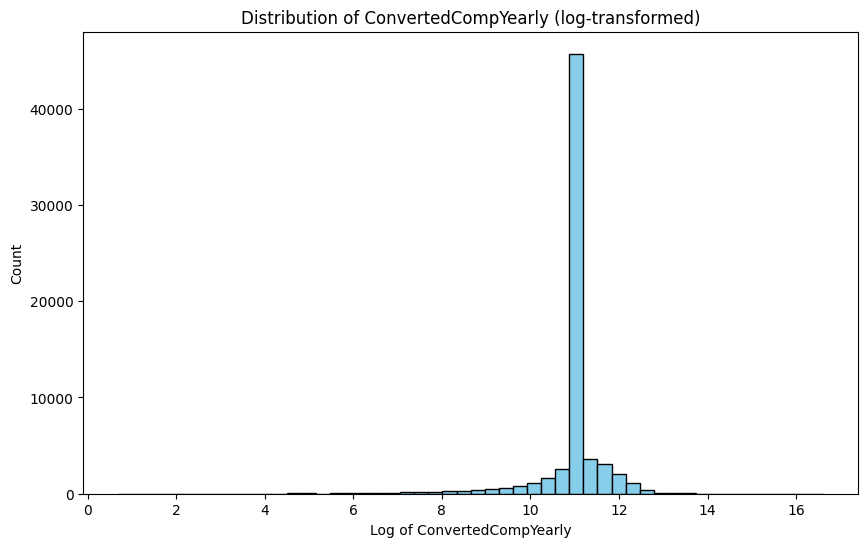

In [13]:
import numpy as np
import matplotlib.pyplot as plt
converted_log = np.log1p(df['ConvertedCompYearly'])

plt.figure(figsize=(10,6))
plt.hist(converted_log, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of ConvertedCompYearly (log-transformed)')
plt.xlabel('Log of ConvertedCompYearly')
plt.ylabel('Count')
plt.show()



### 7. Feature Engineering


<h5>7.1 Create a new column `ExperienceLevel` based on the `YearsCodePro` column:</h5>


In [ ]:
## Write your code here

### Summary


In this lab, you:

- Explored the dataset to identify inconsistencies and missing values.

- Encoded categorical variables for analysis.

- Handled missing values using imputation techniques.

- Normalized and transformed numerical data to prepare it for analysis.

- Engineered a new feature to enhance data interpretation.


Copyright © IBM Corporation. All rights reserved.
